In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
data=pd.read_csv('bank-full.csv')

In [29]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [30]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [31]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

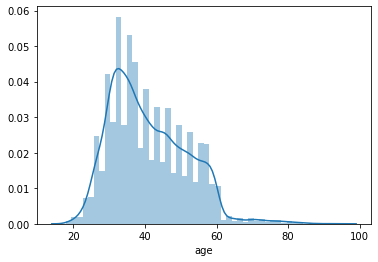

In [32]:
sns.distplot(data['age'])

In [33]:
x=data.drop('Target',axis=1)
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown


In [34]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [35]:
df=data[['age','balance','day','duration','campaign','pdays','previous','Target']]
df.head()

,age,balance,day,duration,campaign,pdays,previous,Target
0,58,2143,5,261,1,-1,0,no
1,44,29,5,151,1,-1,0,no
2,33,2,5,76,1,-1,0,no
3,47,1506,5,92,1,-1,0,no
4,33,1,5,198,1,-1,0,no


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       45211 non-null  int64 
 1   balance   45211 non-null  int64 
 2   day       45211 non-null  int64 
 3   duration  45211 non-null  int64 
 4   campaign  45211 non-null  int64 
 5   pdays     45211 non-null  int64 
 6   previous  45211 non-null  int64 
 7   Target    45211 non-null  object
dtypes: int64(7), object(1)
memory usage: 2.8+ MB


data['Target']=data['Target'].astype('category')
data.info()

In [38]:
df.shape

(45211, 8)

In [39]:
x=df.drop('Target',axis=1)
y=df.pop('Target')

In [40]:
x.head(2)

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0


In [41]:
y.head(2)

0    no
1    no
Name: Target, dtype: object

In [43]:
data['Target'].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

# Data Splitting

In [44]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytain,ytest=train_test_split(x,y,test_size=0.3,random_state=3)


# Logistic Regression Model

In [46]:
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression()
log_reg.fit(xtrain,ytain)
ypred=log_reg.predict(xtest)
t=list(xtrain.columns)
coef_df=pd.DataFrame(log_reg.coef_,columns=t)
coef_df['Ingtercept']=log_reg.intercept_
print(coef_df)

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print('\nThe Accuracy Score \n',accuracy_score(ytest,ypred)*100)
print('\n The Confusion Matrix\n',confusion_matrix(ytest,ypred))
print('\n Classification report\n',classification_report(ytest,ypred))

C:\Users\guruc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


        age   balance       day  duration  campaign     pdays  previous  \
0 -0.040386  0.000035 -0.026744  0.003164  -0.30363  0.001838  0.001714   

   Ingtercept  
0   -0.421889  

The Accuracy Score 
 88.85284576820996

 The Confusion Matrix
 [[11796   173]
 [ 1339   256]]

 Classification report
               precision    recall  f1-score   support

          no       0.90      0.99      0.94     11969
         yes       0.60      0.16      0.25      1595

    accuracy                           0.89     13564
   macro avg       0.75      0.57      0.60     13564
weighted avg       0.86      0.89      0.86     13564



# Boosting Ensemble

# AdaBoosting Classifier

In [52]:
from sklearn.ensemble import AdaBoostClassifier
ada_model=AdaBoostClassifier(base_estimator=log_reg,n_estimators=100,learning_rate=0.01,random_state=2)
ada_model.fit(xtrain,ytain)
ada_pred=ada_model.predict(xtest)
print('\n The Training Accuracy \n', ada_model.score(xtrain,ytain))
print('\n The testing Accuracy \n',ada_model.score(xtest,ytest))


print('\nThe Accuracy Score \n',accuracy_score(ytest,ada_pred)*100)
print('\n The Confusion Matrix\n',confusion_matrix(ytest,ada_pred))
print('\n Classification report\n',classification_report(ytest,ada_pred))

C:\Users\guruc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\guruc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\guruc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\guruc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\guruc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\guruc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\guruc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\guruc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\guruc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\guruc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_


 The Training Accuracy 
 0.8868771131544854

 The testing Accuracy 
 0.8888233559422

The Accuracy Score 
 88.88233559422

 The Confusion Matrix
 [[11854   115]
 [ 1393   202]]

 Classification report
               precision    recall  f1-score   support

          no       0.89      0.99      0.94     11969
         yes       0.64      0.13      0.21      1595

    accuracy                           0.89     13564
   macro avg       0.77      0.56      0.58     13564
weighted avg       0.86      0.89      0.85     13564



# GradientBoosting

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
grad_model=GradientBoostingClassifier(n_estimators=100,criterion='mse')
grad_model.fit(xtrain,ytain)
grad_pred=ada_model.predict(xtest)
print('\n The Training Accuracy \n', grad_model.score(xtrain,ytain))
print('\n The testing Accuracy \n',grad_model.score(xtest,ytest))


print('\nThe Accuracy Score \n',accuracy_score(ytest,grad_pred)*100)
print('\n The Confusion Matrix\n',confusion_matrix(ytest,grad_pred))
print('\n Classification report\n',classification_report(ytest,grad_pred))


 The Training Accuracy 
 0.9025816033115304

 The testing Accuracy 
 0.8987024476555588

The Accuracy Score 
 88.94868770274256

 The Confusion Matrix
 [[11835   134]
 [ 1365   230]]

 Classification report
               precision    recall  f1-score   support

          no       0.90      0.99      0.94     11969
         yes       0.63      0.14      0.23      1595

    accuracy                           0.89     13564
   macro avg       0.76      0.57      0.59     13564
weighted avg       0.87      0.89      0.86     13564



# Voting

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=50, random_state=7)
# create the sub models

estimators = []

model1 = LogisticRegression()
estimators.append(( ' logistic ' , model1))

model2 = DecisionTreeClassifier()
estimators.append(( ' cart ' , model2))

model3 = SVC()
estimators.append(( ' svm ' , model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)

results = cross_val_score(ensemble, xtrain, ytain, cv=kfold)

print(results.mean()*100)
print(results)

C:\Users\guruc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\guruc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\guruc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the numbe

C:\Users\guruc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\guruc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\guruc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\guruc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\guruc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


88.51078848961146
[0.87677725 0.90205371 0.88309637 0.89415482 0.8878357  0.89099526
 0.8957346  0.8957346  0.88309637 0.89257504 0.88151659 0.88151659
 0.87203791 0.88941548 0.87045814 0.87835703 0.88941548 0.89731438
 0.8657188  0.90205371 0.8957346  0.90363349 0.88625592 0.86887836
 0.89731438 0.89415482 0.90047393 0.86887836 0.87203791 0.88467615
 0.8957346  0.89099526 0.87519747 0.86255924 0.88467615 0.8878357
 0.87203791 0.89099526 0.8878357  0.87045814 0.8657188  0.87835703
 0.87519747 0.88941548 0.89257504 0.87835703 0.89099526 0.87816456
 0.88449367 0.90189873]
